## Importing packages and the Dataset to do some EDA

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/kc_house_data.csv')
df_original = df.copy()
%store df_original

Stored 'df_original' (DataFrame)


### Viewing the Data

In [70]:
df.head().iloc[:, 10:]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [71]:
df.head().iloc[:, :11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [73]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


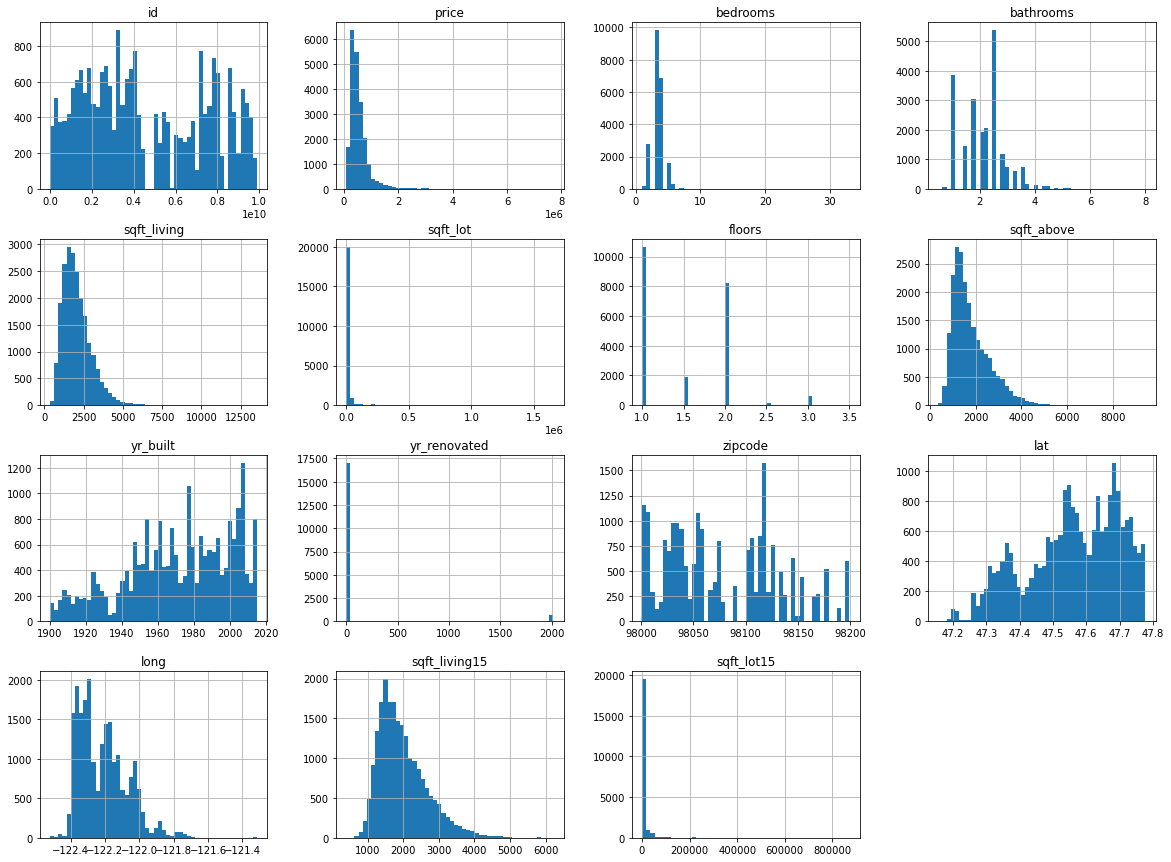

In [75]:
df.hist(bins=50, figsize=(20,15))
plt.show();

#### Initial Takeaways:
- I would like to add a datetime column for the dates, including year and month seperately.
- Waterfront and year renovated seem to be the only columns with NaN values.
- It seems that there is a lot of categorical columns: bedrooms, bathrooms, floors, waterfront, view, grade, condition. Dates and location info like yr_built, yr_renovated, lat, long, and zipcode are also non-continous values. 
- Some zero values might indicate something is non-existent, e.g. when sqft_basement or yr_renovated entry = 0.

### A look at 'Price': Descriptive Statistics 

In [6]:
price = df['price']

In [14]:
len(price[price > 1000000]) 

1458

In [10]:
desc_stat_price = dict(price.describe())

In [11]:
desc_stat_price

{'count': 21597.0,
 'mean': 540296.5735055795,
 'std': 367368.1401013945,
 'min': 78000.0,
 '25%': 322000.0,
 '50%': 450000.0,
 '75%': 645000.0,
 'max': 7700000.0}

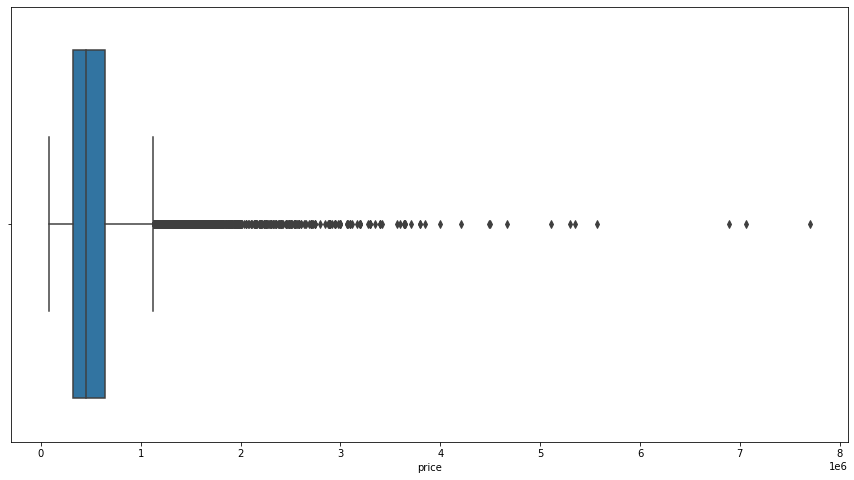

In [12]:
plt.figure(figsize = (15,8))
sns.boxplot(price);

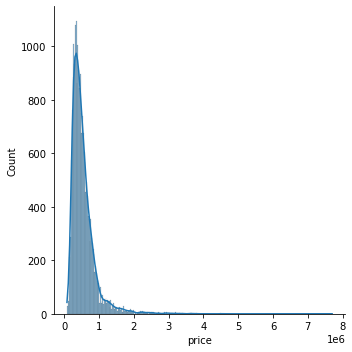

In [18]:
sns.displot(price, kde=True);

#### Takeaways from Price:
- Seems usual that the price would be skewed to the right, many outliers of vey expensive homes.
- Not normally disributed because of that fact. Might need to manipulate before running regression.
- We can assume that this 'price' column will be our dependent vairable in regression models.

## Clean some things up...

### Change date to datetime 

In [59]:
df['date'] = pd.to_datetime(df['date'])

In [60]:
df['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

### Find NaN and 0 values

In [49]:
# of NaN in columns
def num_NaN(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_nan = len(df[df[column].isna() == True])
        percent_nan = round(num_of_nan / len(df[column]) * 100)
        print(f'# of NaN in the {column}: {num_of_nan}, {percent_nan}%')
    return

In [50]:
# of zeros in columns
def num_zeros(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_zeros = len(df[(df[column] == 0) | (df[column] == '0') | (df[column] == '0.0')])
        percent_zeros = round(num_of_zeros / len(df[column]) * 100)
        print(f'# of zeros in the {column}: {num_of_zeros}, {percent_zeros}%')
    return

In [51]:
num_NaN(df)

# of NaN in the id: 0, 0%
# of NaN in the date: 0, 0%
# of NaN in the price: 0, 0%
# of NaN in the bedrooms: 0, 0%
# of NaN in the bathrooms: 0, 0%
# of NaN in the sqft_living: 0, 0%
# of NaN in the sqft_lot: 0, 0%
# of NaN in the floors: 0, 0%
# of NaN in the waterfront: 2376, 11%
# of NaN in the view: 63, 0%
# of NaN in the condition: 0, 0%
# of NaN in the grade: 0, 0%
# of NaN in the sqft_above: 0, 0%
# of NaN in the sqft_basement: 0, 0%
# of NaN in the yr_built: 0, 0%
# of NaN in the yr_renovated: 3842, 18%
# of NaN in the zipcode: 0, 0%
# of NaN in the lat: 0, 0%
# of NaN in the long: 0, 0%
# of NaN in the sqft_living15: 0, 0%
# of NaN in the sqft_lot15: 0, 0%


In [43]:
num_zeros(df)

# of zeros in the id column: 0, 0%
# of zeros in the date column: 0, 0%
# of zeros in the price column: 0, 0%
# of zeros in the bedrooms column: 0, 0%
# of zeros in the bathrooms column: 0, 0%
# of zeros in the sqft_living column: 0, 0%
# of zeros in the sqft_lot column: 0, 0%
# of zeros in the floors column: 0, 0%
# of zeros in the waterfront column: 0, 0%
# of zeros in the view column: 0, 0%
# of zeros in the condition column: 0, 0%
# of zeros in the grade column: 0, 0%
# of zeros in the sqft_above column: 0, 0%
# of zeros in the sqft_basement column: 12826, 59%
# of zeros in the yr_built column: 0, 0%
# of zeros in the yr_renovated column: 17011, 79%
# of zeros in the zipcode column: 0, 0%
# of zeros in the lat column: 0, 0%
# of zeros in the long column: 0, 0%
# of zeros in the sqft_living15 column: 0, 0%
# of zeros in the sqft_lot15 column: 0, 0%


##### 'yr_renovated'

In [52]:
#Turning 0.0 floats into NaN
df['yr_renovated'] = df['yr_renovated'].replace({0.0:np.nan})

##### 'sqft_basement'

In [53]:
# replace zeros and symbols with NaN
df['sqft_basement'] = df['sqft_basement'].replace({'0':np.nan, 0:np.nan, '0.0':np.nan, '?':np.nan})

In [54]:
# Changing numbers from strings to floats
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

##### 'waterfront'

In [55]:
# Checking out the values
print('NaN    ', len(df['waterfront'][df['waterfront'].isna()]))
print(df['waterfront'].value_counts())

NaN     2376
NO     19075
YES      146
Name: waterfront, dtype: int64


##### 'view'

In [56]:
# Checking out the values
print('NaN            ', len(df['view'][df['view'].isna()]))
print(df['view'].value_counts())

NaN             63
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [57]:
df['view'].sort_values(ascending=False)

21596    NONE
7600     NONE
7592     NONE
7593     NONE
7594     NONE
         ... 
19989     NaN
20148     NaN
20380     NaN
21057     NaN
21589     NaN
Name: view, Length: 21597, dtype: object

In [58]:
#What is the difference between NaN and NONE here?

### Add a month column

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month

## Review of our cleaning

In [ ]:
df.head()

In [ ]:
df.info()

## Storing clean data

In [ ]:
df_clean = df.copy()

In [ ]:
%store df_clean

#### What happened:
- Changed date column to date-time object
- Added a month column
- Changed zero values on 'sqft_basement' and 'yr_renovated' to NaN
- Inspeceted on NaN values in 'view' and 'waterfront'

## Correlations Explorations :)

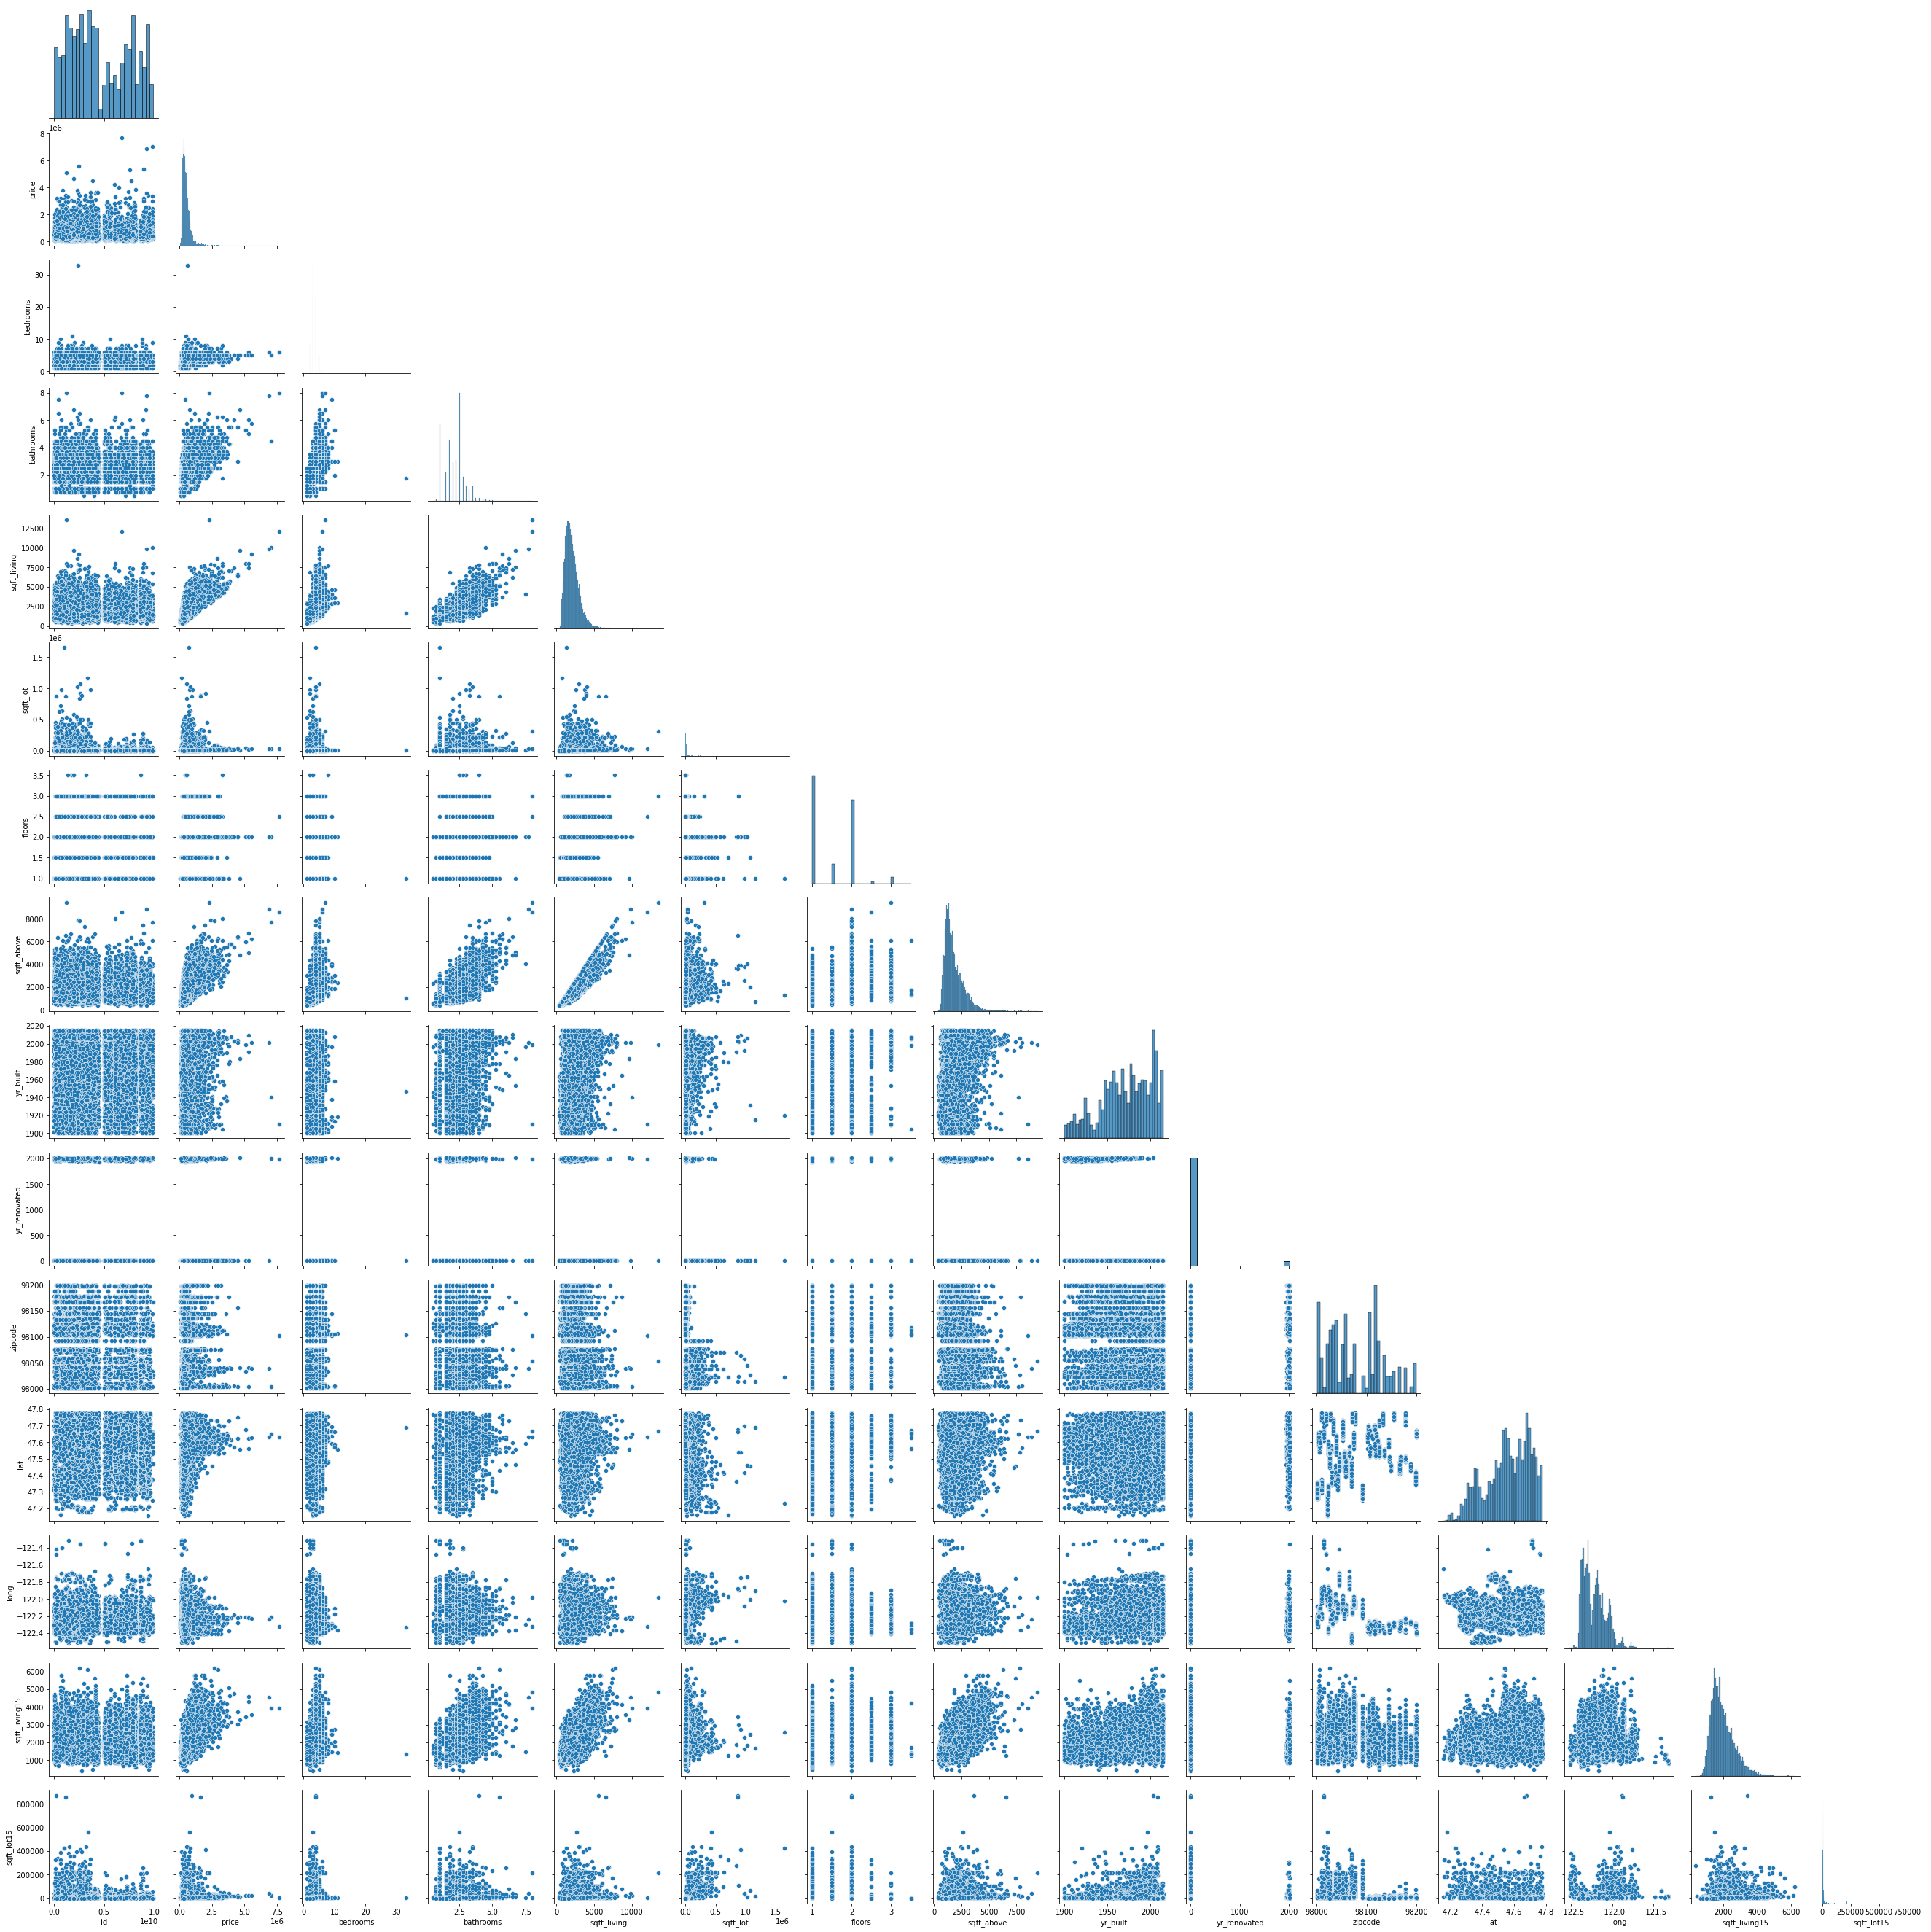

In [76]:
sns.pairplot(data=df, corner=True);

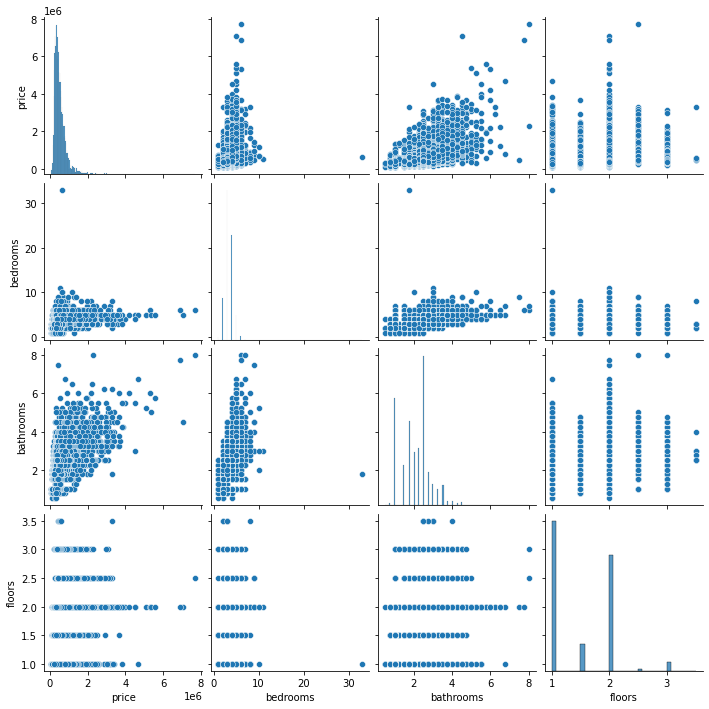

In [77]:
sns.pairplot(data=df, vars=['price', 'bedrooms', 'bathrooms', 'floors']);


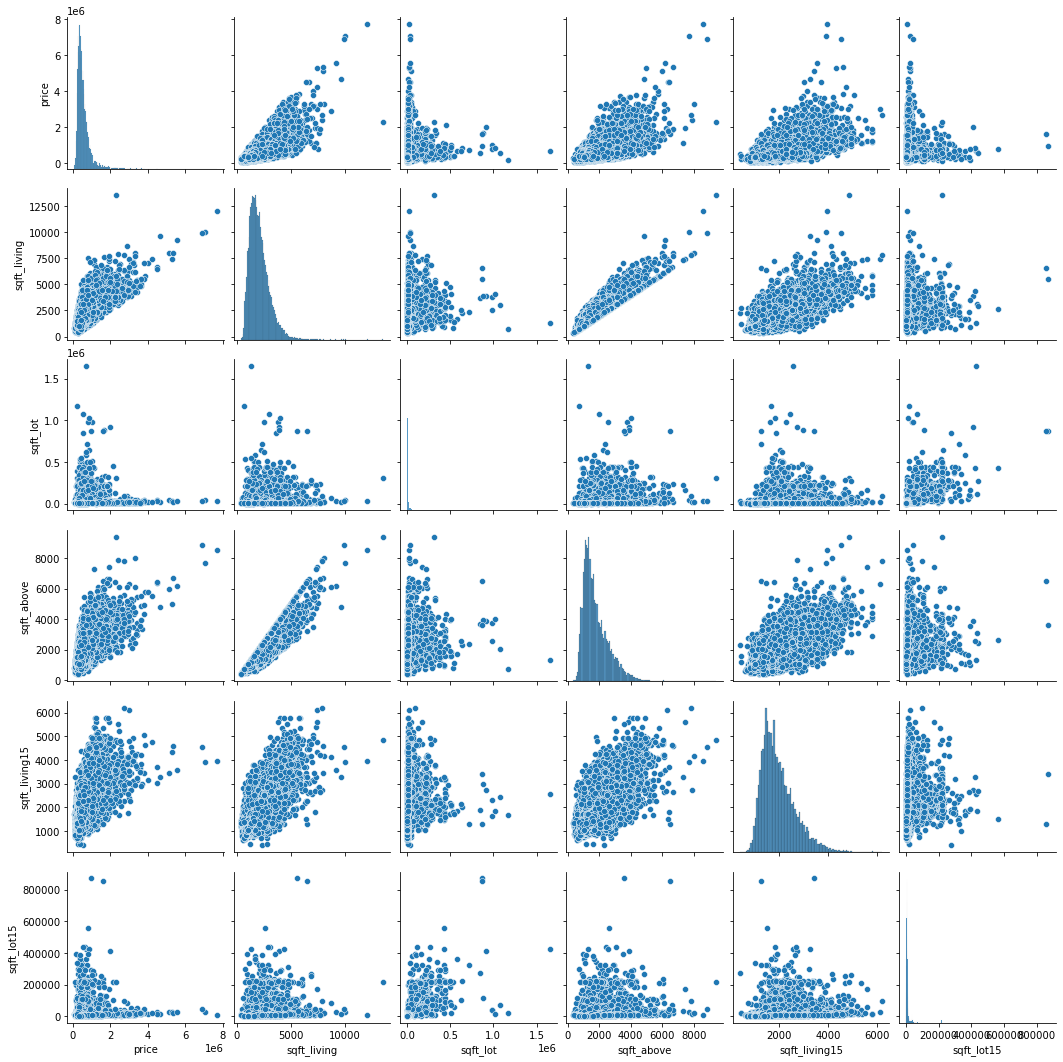

In [78]:
sns.pairplot(data=df, vars=['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']);


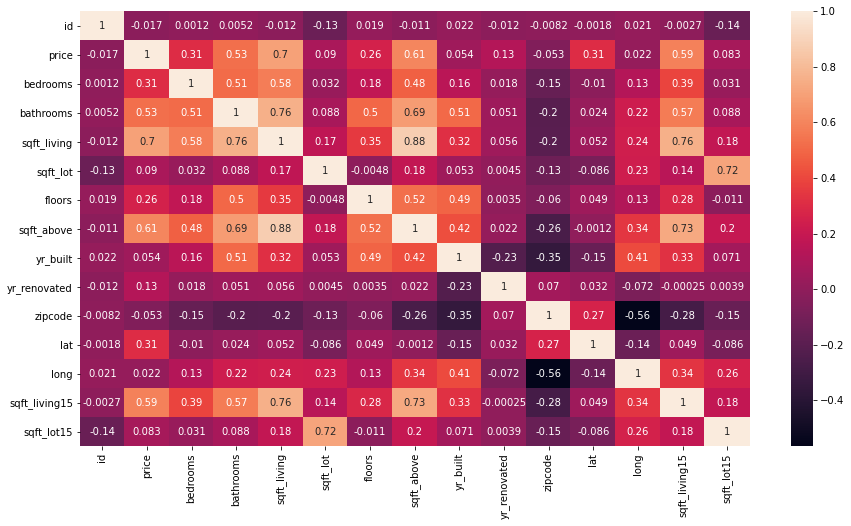

In [79]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True);

In [81]:
abs(df.corr()) > .70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [96]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [100]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

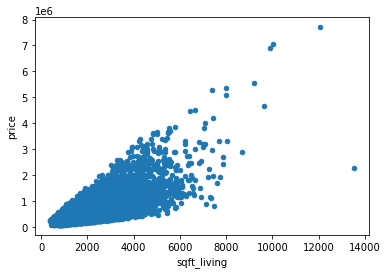

In [83]:
df.plot(kind='scatter', x='sqft_living', y='price');

## Simple Linear Regression Model

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
X = df['sqft_living']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
simple_model_summary = simple_model.summary()
simple_model_summary

In [ ]:
X = df['sqft_living15']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
simple_model_summary = simple_model.summary()
simple_model_summary

## Takeaway:
- The strongest correlations to price still have a low R-squared value with 'price' as dependent variable in simple linear regression model.
- These models don't do justice given the price variable is not normally distributed. 


## Goals for next session:
- Domain research: figure out what the variables really mean, e.g. sqft_living vs. sqft_living15
- Make adjustments to follow L.I.N.H. assumptions
- Run a multiple regression and find best way to introduce categorical variables to the model.

## Multicollinearity Search 

In [61]:
# going to remove the dependent varibale 'price' to explore predictors. 
# Also removing 'id' and and 'date'but will keep 'month' and all other variables.
df_pred = df.iloc[:,3:]
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  object 
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  8317 non-null   float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   744 non-null    float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

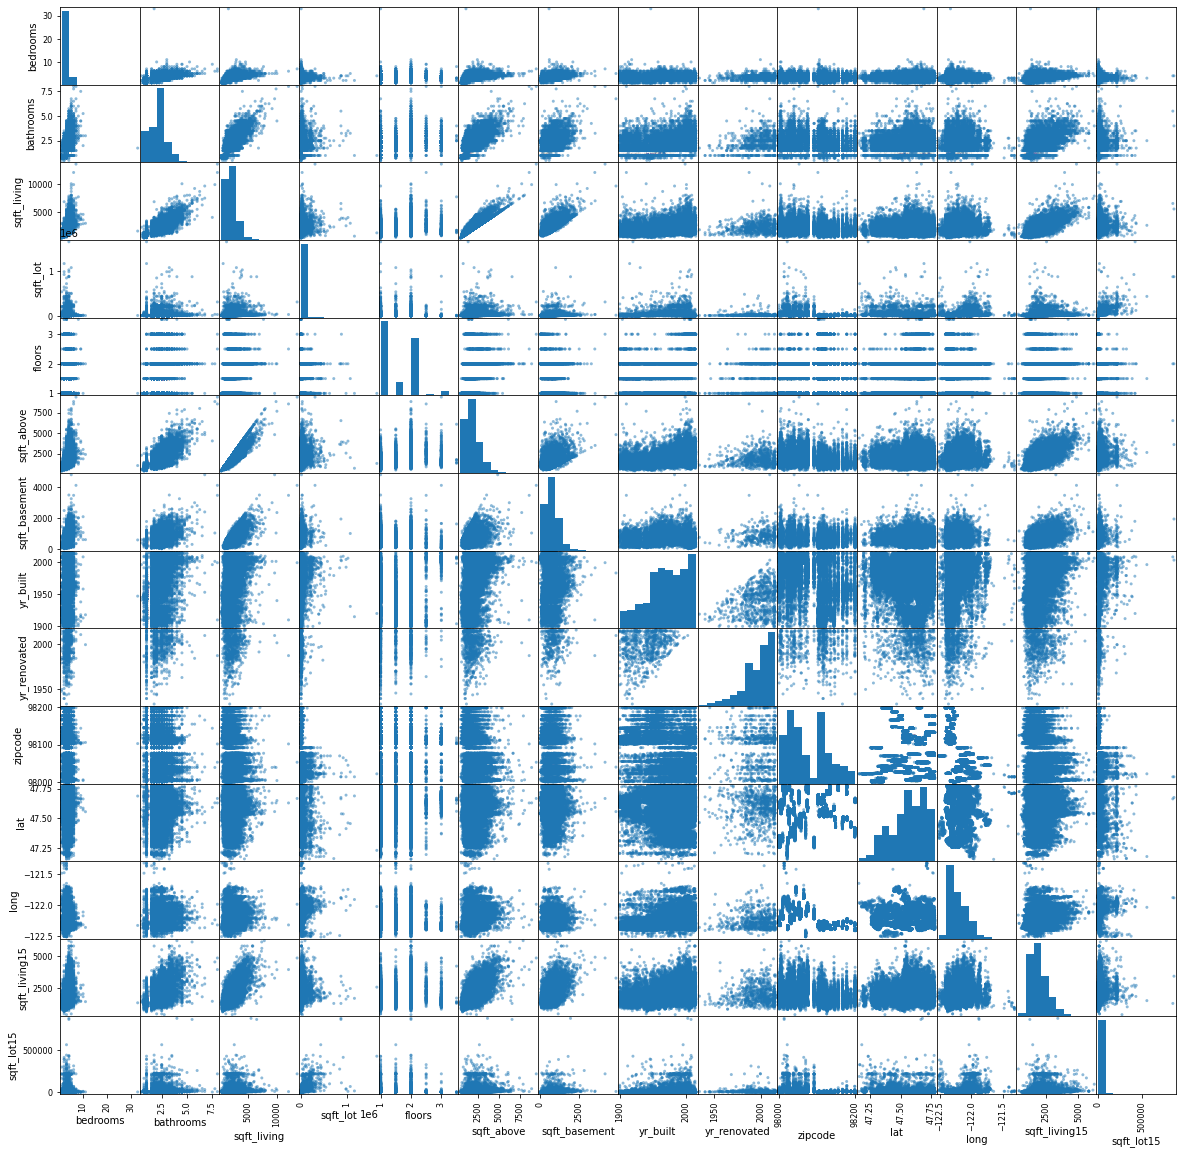

In [62]:
pd.plotting.scatter_matrix(df_pred, figsize=[20, 20]);
plt.show()

In [63]:
abs(df_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [64]:
df_corr_pairs = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr_pairs['pairs'] = list(zip(df_corr_pairs.level_0, df_corr_pairs.level_1))
df_corr_pairs.set_index(['pairs'], inplace = True)
df_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr_pairs.columns = ['cc']
df_corr_pairs = df_corr_pairs.drop_duplicates()

In [65]:
df_high_corr_pairs = df_corr_pairs[(df_corr_pairs['cc'] > .70) & (df_corr_pairs['cc'] < 1)]

In [66]:
%store df_high_corr_pairs

Stored 'df_high_corr_pairs' (DataFrame)


In [67]:
df_high_corr_pairs

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_living, sqft_basement)",0.716030


In [ ]:
# it seems we will need to get rid of a lot of variables here.

# Will need to choose one measure of sqft amoung the types: sqft_living, sqft_living15, sqft_above, sqft_basement

# Will have to take a closer look at bathrooms since the are not technically continous 
#     altough they follow a numeric order.

# sqft_lot and sqft_lot15 are correlated to each other but not to any of the other sqft measures, 
#     so we can likely choose one of these measure for our model.

## Try a multi regression model

In [ ]:
f = 'price ~ sqft_living + sqft_lot'
multi_model = ols(formula=f, data=df).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

In [ ]:
# This barely improved the model, and actually made the condition number worse. Might need to look at something else.